In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
from datetime import datetime
from scipy import stats
import scipy.optimize

from os import listdir
from os.path import isfile, join

rootfolder="/home/aulegoup/Optical_fibers/Absorption_spectra_experiments/"

# Extract all from folder

In [2]:
FILES=[
        {'NameFoldExtract':"2024-07-31 - sample B continuous sw at 1550nm 2nd try halfmW",
        'NameSubFoldTemp':"Temperature data",
        'NameCSVforTemp':"2024-07-31 Wed 10h49min32s - fiber T curve - dur 11032s.csv",
        'firstfilenb':0,
        'samplelength':18.24, #m
        'sweepperiod':2.261}, #s
    
        {'NameFoldExtract':"2024-08-01 - sample B continuous sw at 1550nm 3rd try 5uW",
        'NameSubFoldTemp':"Temperature data",
        'NameCSVforTemp':"2024-08-01 Thu 08h08min16s - fiber T curve - dur 22758s.csv",
        'firstfilenb':0,
        'samplelength':18.24, #m
        'sweepperiod':2.261}, #s

]


In [3]:
DIC_fprop={}

for idfiles,dicfile in enumerate(FILES) :
    #######################################################################################################
    #First, let's extract all the time information from the filenames.
    #######################################################################################################
    
    mypath=join(rootfolder,dicfile["NameFoldExtract"])
    LISTFILES = sorted([f for f in listdir(mypath) if isfile(join(mypath, f))])[dicfile['firstfilenb']:]
    Nfiles=len(LISTFILES)
    
    #List file properties
    DIC_fprop[idfiles]={
        "Name2Id":{},
        "Id2Name":{},
        "Id2Datetime":{},
        "Id2WL":{},
        "Id2LEVEL":{}
    }
    for i,f in enumerate(LISTFILES):
        DATE=f.split('_')[0].split('W')[1]
        YY=DATE[:4]
        MM=DATE[4:6]
        DD=DATE[6:8]
        H=f.split('.')[0].split('_')[1][:2]
        M=f.split('.')[0].split('_')[1][2:4]
        S=f.split('.')[0].split('_')[1][4:6]
        ISOTIME=f"{YY}-{MM}-{DD}T{H}:{M}:{S}-05:00"
        DIC_fprop[idfiles]["Name2Id"][f]=i
        DIC_fprop[idfiles]["Id2Name"][i]=f
        DIC_fprop[idfiles]["Id2Datetime"][i]=datetime.fromisoformat(ISOTIME)
        if i==0:
            print(DIC_fprop[idfiles])
    
    
    #######################################################################################################
    #Now, let's extract the spectra from the files:
    #######################################################################################################
    
    for i in range(Nfiles):
        with open(join(mypath,DIC_fprop[idfiles]["Id2Name"][i]),'r') as f:
                LINES=f.readlines()
                N=len(LINES)
                n=0
                while "[TRACE DATA]" not in LINES[n]:
                    n+=1
                WL_nm,LEVEL_dBm=[],[]
                for j in range(n+1,N):
                    l=LINES[j]
                    if '.' in l:
                        wl=float((l.split(','))[0])
                        lvl=float((l.split(','))[1])
                        if wl>=600 and wl<=1700:
                            WL_nm+=[wl]
                            LEVEL_dBm+=[lvl]
        if i==0:
            WL_nm0=WL_nm
        elif WL_nm0!=WL_nm:
            raise NameError(f"WL difference at id {i}")
        DIC_fprop[idfiles]["Id2LEVEL"][i]=np.array(LEVEL_dBm)
    
    DIC_fprop[idfiles]["WL_nm"]=np.array(WL_nm)


def add_subplot_axes(ax,rect,axisbg='w'):
    #https://stackoverflow.com/questions/17458580/embedding-small-plots-inside-subplots-in-matplotlib
    fig = plt.gcf()
    box = ax.get_position()
    width = box.width
    height = box.height
    inax_position  = ax.transAxes.transform(rect[0:2])
    transFigure = fig.transFigure.inverted()
    infig_position = transFigure.transform(inax_position)    
    x = infig_position[0]
    y = infig_position[1]
    width *= rect[2]
    height *= rect[3]  # <= Typo was here
    subax = fig.add_axes([x,y,width,height])#,facecolor=facecolor)  # matplotlib 2.0+
    #subax = fig.add_axes([x,y,width,height],axisbg=axisbg)
    x_labelsize = subax.get_xticklabels()[0].get_size()
    y_labelsize = subax.get_yticklabels()[0].get_size()
    x_labelsize *= rect[2]**0.5
    y_labelsize *= rect[3]**0.5
    subax.xaxis.set_tick_params(labelsize=x_labelsize)
    subax.yaxis.set_tick_params(labelsize=y_labelsize)
    return subax


{'Name2Id': {'W20240731_105245.CSV': 0}, 'Id2Name': {0: 'W20240731_105245.CSV'}, 'Id2Datetime': {0: datetime.datetime(2024, 7, 31, 10, 52, 45, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400)))}, 'Id2WL': {}, 'Id2LEVEL': {}}
{'Name2Id': {'W20240801_081129.CSV': 0}, 'Id2Name': {0: 'W20240801_081129.CSV'}, 'Id2Datetime': {0: datetime.datetime(2024, 8, 1, 8, 11, 29, tzinfo=datetime.timezone(datetime.timedelta(days=-1, seconds=68400)))}, 'Id2WL': {}, 'Id2LEVEL': {}}


W20240801_082130.CSV
9784
600.4


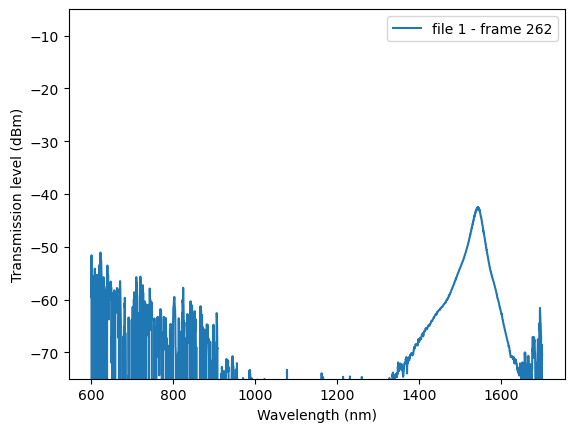

In [4]:
  
# fig, ax = plt.subplots()


fileid=1
# idtest=4532
for idtest in [262]:

    print(DIC_fprop[fileid]["Id2Name"][idtest])
    
    print(len( DIC_fprop[fileid]["Id2LEVEL"]))
    print(WL_nm[np.argmax(DIC_fprop[fileid]["Id2LEVEL"][364])])
    
    fig, ax = plt.subplots()
    
    ax.plot(WL_nm, DIC_fprop[fileid]["Id2LEVEL"][idtest],label=f"file {fileid} - frame {idtest}")
    ax.set_xlabel("Wavelength (nm)")
    ax.set_ylabel("Transmission level (dBm)")
    ax.set_ylim(-75, -5)
    # plt.xlim(1550-10,1550+10)
    ax.legend()
    plt.show()

<>:11: SyntaxWarning: invalid escape sequence '\m'
<>:11: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_12422/330086292.py:11: SyntaxWarning: invalid escape sequence '\m'
  ax.plot(WL_nm, DIC_fprop[fileid]["Id2LEVEL"][idtest],label=f"Before experiment at 5 $\mu$W",color=COLORS[1])


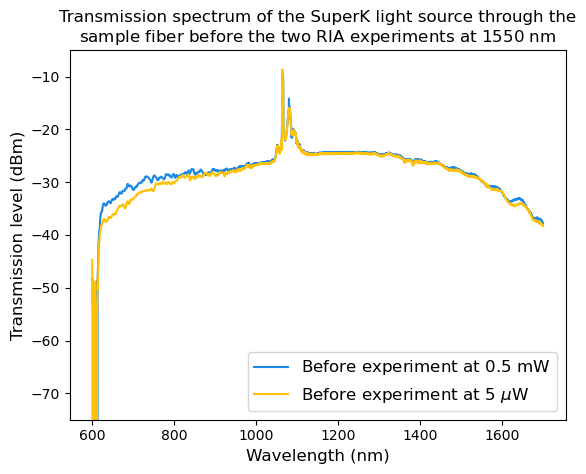

In [21]:
COLORS = ["#1E88E5","#FFC107"]

fig, ax = plt.subplots()


fileid=0
idtest=363#364
ax.plot(WL_nm, DIC_fprop[fileid]["Id2LEVEL"][idtest],label=f"Before experiment at $0.5$ mW",color=COLORS[0])
fileid=1
idtest=261#262
ax.plot(WL_nm, DIC_fprop[fileid]["Id2LEVEL"][idtest],label=f"Before experiment at 5 $\mu$W",color=COLORS[1])


ax.set_xlabel("Wavelength (nm)",fontsize=12)
ax.set_ylabel("Transmission level (dBm)",fontsize=12)
ax.set_ylim(-75, -5)
# plt.xlim(1550-10,1550+10)
ax.legend(fontsize=12)
# plt.title("Thorlabs LPS-1550-FC fiber-pigtailed 1550nm laser spectrum\nthrough the absorption spectroscopy setup")
plt.title("Transmission spectrum of the SuperK light source through the\nsample fiber before the two RIA experiments at $1550$ nm")
# plt.show()
# plt.savefig("LPS-1550-FC_Spectrum.pdf")
plt.savefig("1550Exp-StartingWLSpect_CB.pdf",bbox_inches='tight')

# RIA at fixed wl versus time

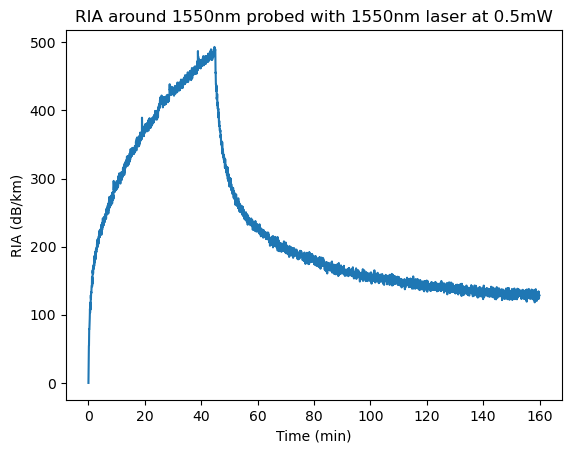

In [6]:
fileid = 0
i_start = 364
i_end = 4533

TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod']/60  *45/44.2 #min (correction for zeroing times)

RIA_avgrange = (1550-10,1550+10)
ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
# print(ID_avgrange)

#RIA in dB/km
mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
                              - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])



plt.plot(TIME,mean_RIA)
plt.xlabel("Time (min)")
plt.ylabel("RIA (dB/km)")
plt.title("RIA around 1550nm probed with 1550nm laser at 0.5mW")
plt.show()

# plt.plot(TIME[(TIME>40) * (TIME<50)],mean_RIA[(TIME>40) * (TIME<50)])
# plt.xlabel("Time (min)")
# plt.ylabel("RIA (dB/km)")
# plt.show()

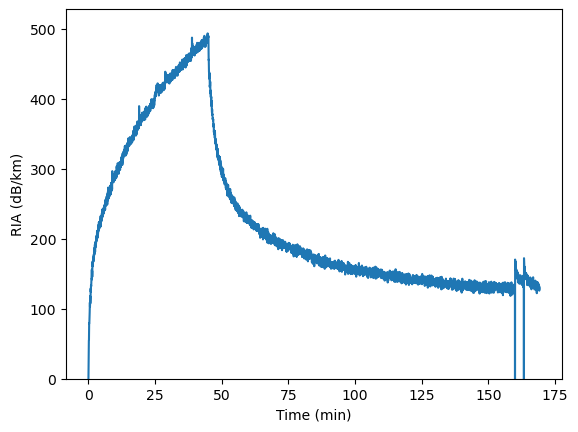

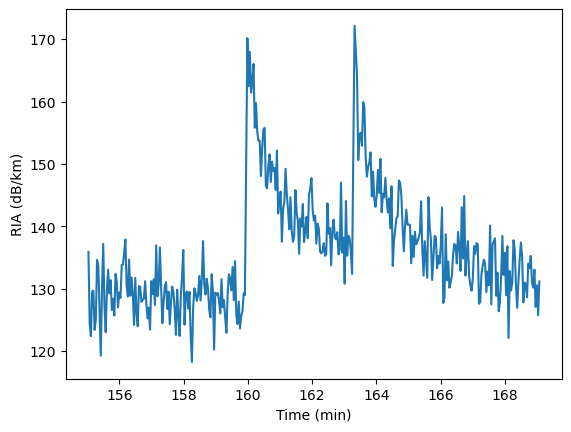

In [7]:
fileid = 0
i_start = 364
# i_end = 4533
i_end = 4772

t_a = (4533-i_start) * FILES[fileid]['sweepperiod']/60  *45/44.2
t_b = (4620-i_start) * FILES[fileid]['sweepperiod']/60  *45/44.2
TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod']/60  *45/44.2 #min (correction for zeroing times)

RIA_avgrange = (1550-10,1550+10)
ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
# print(ID_avgrange)

#RIA in dB/km
mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
                              - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])



plt.plot(TIME,mean_RIA)
plt.xlabel("Time (min)")
plt.ylabel("RIA (dB/km)")
plt.ylim(0)
plt.show()

plt.plot(TIME[(TIME>155) * (TIME!=t_a) * (TIME!=t_b)],mean_RIA[(TIME>155) * (TIME!=t_a) * (TIME!=t_b)])
plt.xlabel("Time (min)")
plt.ylabel("RIA (dB/km)")
plt.show()


# Exp August 1

9783


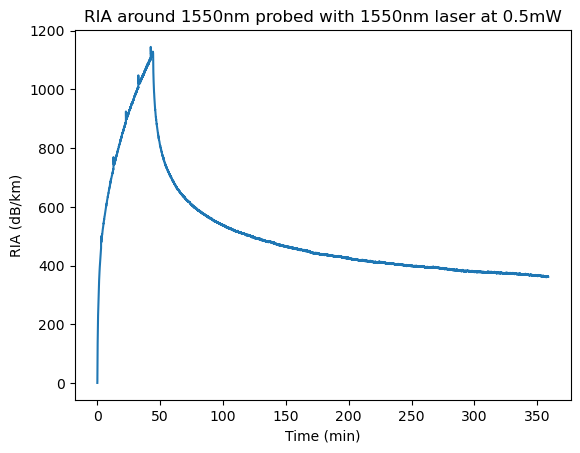

In [8]:
fileid = 1
i_start = 262
i_end = len(DIC_fprop[fileid]["Id2LEVEL"])-1
print(i_end)

TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod']/60  #*45/44.2 #min (correction for zeroing times)

RIA_avgrange = (1550-10,1550+10)
ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
# print(ID_avgrange)

#RIA in dB/km
mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
                              - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])



plt.plot(TIME,mean_RIA)
plt.xlabel("Time (min)")
plt.ylabel("RIA (dB/km)")
plt.title("RIA around 1550nm probed with 1550nm laser at 0.5mW")
plt.show()

# plt.plot(TIME[(TIME>40) * (TIME<50)],mean_RIA[(TIME>40) * (TIME<50)])
# plt.xlabel("Time (min)")
# plt.ylabel("RIA (dB/km)")
# plt.show()

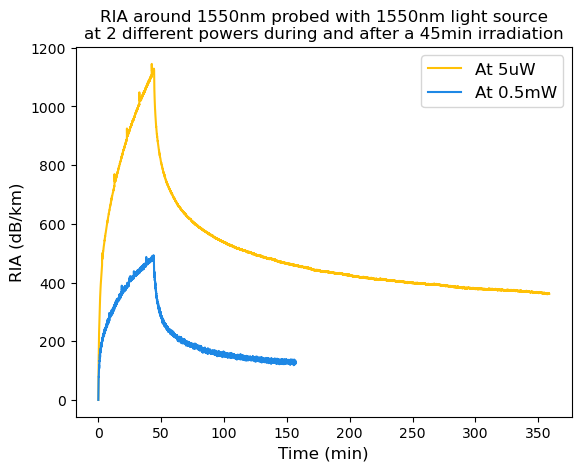

In [20]:
COLORS = ["#1E88E5","#FFC107"]

for fileid,i_start,i_end,label in [(0,364,4533,"At 0.5mW"),(1,262,9783,"At 5uW")][::-1]:
    
    TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod']/60  #*45/44.2 #min (correction for zeroing times)
    
    RIA_avgrange = (1550-10,1550+10)
    ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
    # print(ID_avgrange)
    
    #RIA in dB/km
    mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
                                  - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])
    
    
    
    plt.plot(TIME,mean_RIA,label=label,color=COLORS[fileid])
    # y_valtoannotate=mean_RIA[next(k for k, value in enumerate(TIME) if value > 45)]
    # plt.annotate(label,(50,y_valtoannotate), xycoords="data",#"figure fraction",
    #              fontsize=12,color=COLORS[fileid],weight='bold') #bbox={"boxstyle" : "circle", "color":COLORS[i]},
plt.xlabel("Time (min)",fontsize=12)
plt.ylabel("RIA (dB/km)",fontsize=12)
plt.title("RIA around 1550nm probed with 1550nm light source\nat 2 different powers during and after a 45min irradiation")

plt.legend(fontsize=12)
# plt.show()
plt.savefig("Evol1550exp_CB.pdf")

# for fileid,i_start,i_end,label in [(0,364,4533,"Jul31-.5mW"),(1,262,9783,"Aug1-5uW")]:
    
#     TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod']/60  #*45/44.2 #min (correction for zeroing times)
    
#     RIA_avgrange = (1550-10,1550+10)
#     ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
#     # print(ID_avgrange)
    
#     #RIA in dB/km
#     mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
#                                   - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])
    
    
    
#     plt.plot(TIME,mean_RIA/max(mean_RIA),label=label)
# plt.xlabel("Time (min)")
# plt.ylabel("RIA (normalized by max)")
# plt.title("RIA around 1550nm probed with 1550nm laser at different op. powers")
# plt.legend()
# plt.show()


<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:2: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_1800/4136463217.py:2: SyntaxWarning: invalid escape sequence '\m'
  for fileid,i_start,i_end,label in [(1,262,9783,"5$\mu$W")]:
/tmp/ipykernel_1800/4136463217.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.title("RIA probed with 1550nm laser at 5$\mu$W\nduring and after a 45min irradiation")


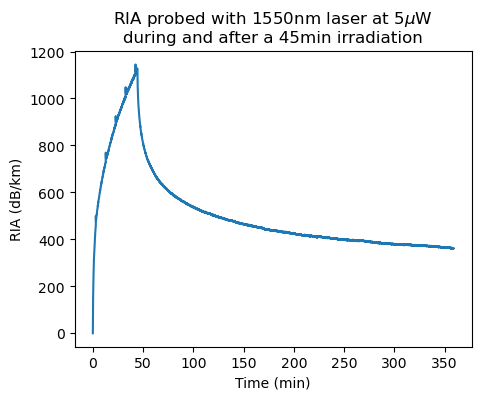

In [13]:
plt.figure(figsize=[6.4*0.8, 4.8*0.8])
for fileid,i_start,i_end,label in [(1,262,9783,"5$\mu$W")]:
    
    TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod']/60  #*45/44.2 #min (correction for zeroing times)
    
    RIA_avgrange = (1550-10,1550+10)
    ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
    # print(ID_avgrange)
    
    #RIA in dB/km
    mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
                                  - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])
    
    
    
    plt.plot(TIME,mean_RIA,label=label)
plt.xlabel("Time (min)")
plt.ylabel("RIA (dB/km)")
plt.title("RIA probed with 1550nm laser at 5$\mu$W\nduring and after a 45min irradiation")
# plt.legend()
# plt.show()
plt.savefig("Evol1550exp-5uW.pdf")

<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_111701/2850975917.py:19: SyntaxWarning: invalid escape sequence '\m'
  for fileid,i_start,i_end,label in [(0,364,4533,"Annealing at 0.5mW"),(1,262,9783,"Annealing at 5$\mu$W")]:
/home/aulegoup/miniforge/envs/jupenv/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/home/aulegoup/miniforge/envs/jupenv/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/home/aulegoup/miniforge/envs/jupenv/lib/python3.12/site-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


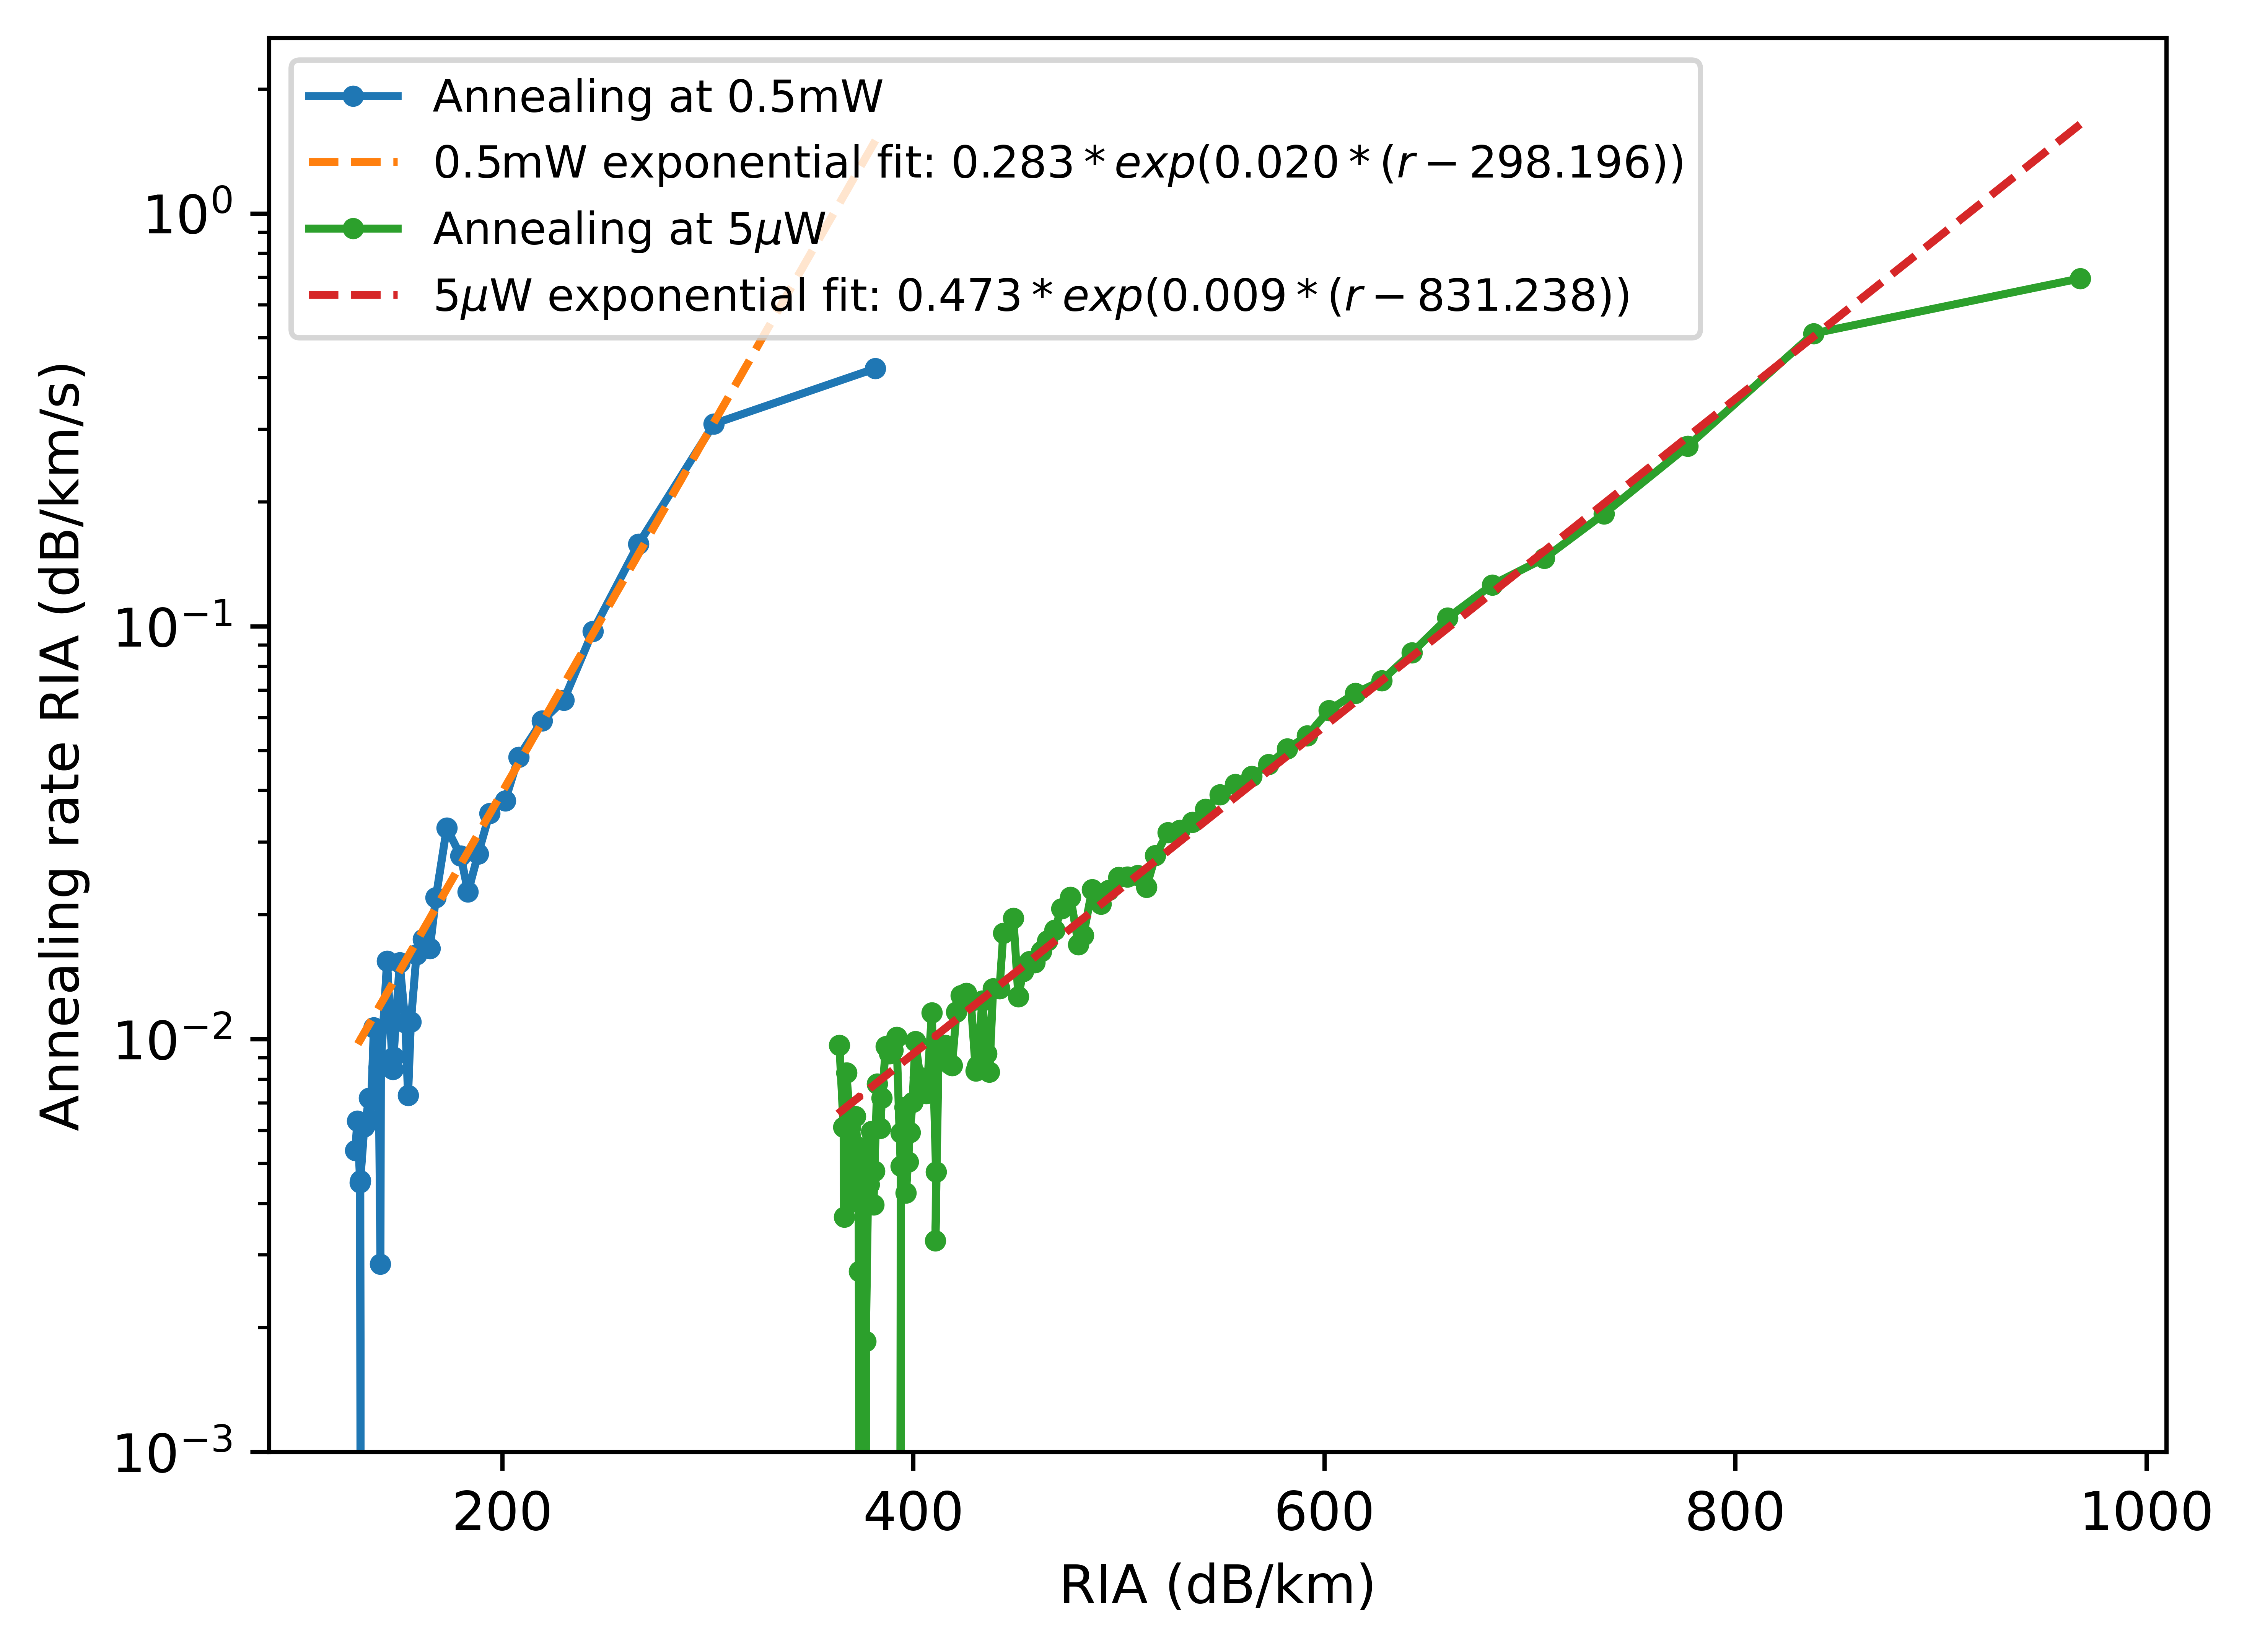

In [80]:
def reducedata(X,Y,npointsinterp=9):
    assert len(X)==len(Y)
    X,Y=np.array(X),np.array(Y)
    X_f,Y_f=[],[]
    for i in range(0,len(Y),npointsinterp):
        upper=min(i+npointsinterp,len(Y))
        X_short,Y_short = X[i:upper],Y[i:upper]
        res = stats.linregress(X_short, Y_short)
        x = np.mean(X_short)
        y = res.intercept + res.slope*x
        X_f+=[x]
        Y_f+=[y]
    return np.array(X_f),np.array(Y_f)

def monoExpPos(x, x0, a0, alpha):
    return (a0-a1) * np.exp(alpha * (x-x0))

plt.figure(dpi=1000)
for fileid,i_start,i_end,label in [(0,364,4533,"Annealing at 0.5mW"),(1,262,9783,"Annealing at 5$\mu$W")]:
    
    TIME = np.arange(i_end-i_start) * FILES[fileid]['sweepperiod'] *45/44.2 #min (correction for zeroing times)
    
    RIA_avgrange = (1550-10,1550+10)
    ID_avgrange = ( next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[0]),  next(x for x, val in enumerate(WL_nm) if val >= RIA_avgrange[1]) )
    # print(ID_avgrange)
    
    #RIA in dB/km
    mean_RIA = np.array([np.mean( ( DIC_fprop[fileid]["Id2LEVEL"][i_start][ID_avgrange[0]:ID_avgrange[1]+1]
                                  - DIC_fprop[fileid]["Id2LEVEL"][i][ID_avgrange[0]:ID_avgrange[1]+1]       ) / FILES[fileid]['samplelength'] * 1000) for i in range(i_start,i_end)])
    
    

    TIME,mean_RIA=TIME[TIME>45*60],mean_RIA[TIME>45*60]
    TIME,mean_RIA=reducedata(TIME,mean_RIA)
    TIME,mean_RIA=reducedata(TIME,mean_RIA)
    annealingrate = - np.gradient(mean_RIA, TIME[1]-TIME[0])
    
    plt.semilogy(mean_RIA,annealingrate,label=label,marker='o',markersize=3)
    
    if True:
        params = ( mean_RIA[1], annealingrate[1], -np.log( (annealingrate[1])/(annealingrate[len(annealingrate)//2]) )/(mean_RIA[len(annealingrate)//2]-mean_RIA[1]) )
        params, cv = scipy.optimize.curve_fit(monoExpPos, mean_RIA[1:len(annealingrate)//2], annealingrate[1:len(annealingrate)//2], params)
        # plt.scatter(time,Temperatures,s=2)
        # plt.plot(time, monoExp(time,*params))
        # plt.show()
        Fit=monoExpPos(mean_RIA,*params)
        x0, a0, alpha = params
        plt.semilogy(mean_RIA,Fit,label=label.split(" at ")[1]+" exponential fit"+": "+f"${a0-a1:.3f} * exp({alpha:.3f} * (r-{x0:.3f}))$",linestyle="dashed")
plt.ylim(bottom=1e-3)
plt.xlabel("RIA (dB/km)")
plt.ylabel("Annealing rate RIA (dB/km/s)")
# plt.title("Annealing rate as a function of RIA around 1550nm probed with 1550nm laser at different op. powers")
plt.legend(fontsize="small")
# plt.show()
plt.savefig("AnnealingRateFit1550.pdf")
